<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/INSEA_logo.png" alt="Alt text" style="width:100px; height:100px;">
<div style="font-size:2rem;  font-weight: bold;">Institut National de Statistique et d'Economie Appliquée</div>
<p><a href="https://www.linkedin.com/in/khalid-boussaroual/"><h3>Khalid BOUSSAROUAL #M2SI</h3></a></p>
<p><a href="mailto:kboussaroual@insea.ac.ma">kboussaroual@insea.ac.ma</a></p>

# Probleme d'optimisation sans contrainte

# Méthode de recherche de Fibonacci (Fibonacci Search Method):

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt


<img src="https://i.ibb.co/M2m25Dw/Fibonacci.png" alt="Fibonacci" width="750"/>


In [2]:
def fibonacci(n):
    fib = [1, 1]
    for i in range(2, n + 1):
        fib.append(fib[i - 1] + fib[i - 2])
    return fib

In [3]:
def fibonacci_search(bounds, n, epsilon, f):
    a, b = bounds

    fib_numbers = fibonacci(n)
    L1 = b - a
    L2 = (fib_numbers[-2] / fib_numbers[-1]) * L1 + ((-1) ** n / fib_numbers[-1]) * epsilon
   
    x1 =  b - L2
    x2 = a + L2
    
    for _ in range(2, n):
        if f(x1) > f(x2):
            a = x1
            x1 = a + b - x2 
        else:
            b = x2
            x2 = a + b - x1

        if x1 > x2:
            x1, x2 = x2, x1
        
    x_optimal = x1 if f(x1) < f(x2) else  x2
    return x_optimal, f(x_optimal)

#### Exemple d'Utilisation (1) :
Appliquons l'algorithme de recherche de Fibonacci à un exemple simple :

Effectuez une recherche de Fibonacci en **4** expériences sur la fonction 
$$ f (x) = 2x^2 - 3x + 5e^{—x}$$
dans l'intervalle initial d'incertitude **[0, 2]**

Solution optimale : 1.12, Valeur minimale : 0.78


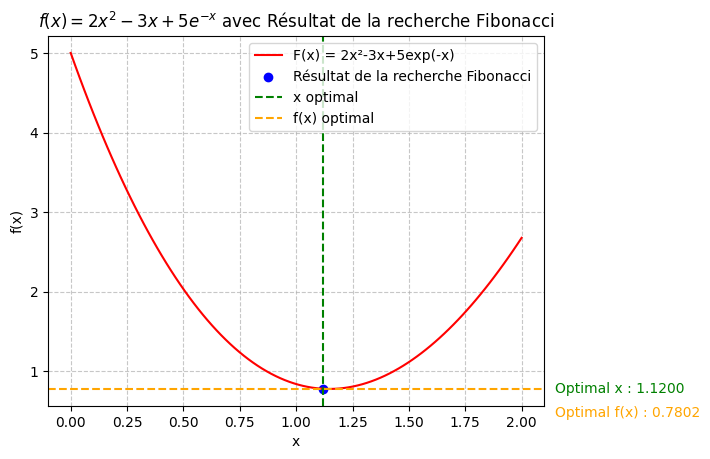

In [4]:
def f(x):
    return 2*x**2 - 3 * x + 5 * np.exp(-x)

bornes = [0, 2]
n = 4
epsilon = 0.1
x_optimal, fun_optimal = fibonacci_search(bornes, n, epsilon, f)

print(f"Solution optimale : {x_optimal:.2f}, Valeur minimale : {fun_optimal:.2f}")

x = np.linspace(bornes[0], bornes[1], 100)
plt.plot(x, f(x), 'r-', label='F(x) = 2x²-3x+5exp(-x)')
plt.scatter(x_optimal, fun_optimal, color='blue', label='Résultat de la recherche Fibonacci', marker='o')

plt.grid(True, linestyle='--', alpha=0.7)

plt.axvline(x_optimal, color='green', linestyle='--', label='x optimal')
plt.axhline(fun_optimal, color='orange', linestyle='--', label='f(x) optimal')
plt.text(2.15, fun_optimal, f'Optimal x : {x_optimal:.4f}', verticalalignment='center', fontsize=10, color='green')
plt.text(2.15, fun_optimal - 0.3, f'Optimal f(x) : {fun_optimal:.4f}', verticalalignment='center', fontsize=10, color='orange')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f (x) = 2x^2 - 3x + 5e^{-x}$ avec Résultat de la recherche Fibonacci')
plt.legend()

plt.show()

# Méthode de Recherche de la Section Dorée

<img src="https://i.ibb.co/1GBXGtN/Section-Dor-e.png" alt="Section Dorée" width="750"/>

In [5]:
def golden_Section_Search(bounds, epsilon, f):
    a, b = bounds

    fib_numbers = fibonacci(n)
    L1 = b - a
    L2 = L1*(np.sqrt(5)-1)/2
    
    x1 =  b - L2
    x2 = a + L2
    
    while b - a > epsilon:
        if f(x1) > f(x2):
            a = x1
            x1 = a + b - x2 
        else:
            b = x2
            x2 = a + b - x1

        if x1 > x2:
            x1, x2 = x2, x1

    x_optimal = x1 if f(x1) < f(x2) else  x2
    return x_optimal, f(x_optimal)

#### Exemple d'Utilisation (2):
Effectuez une recherche de la section dorée sur la fonction 
$$
f(x) = - sin(x) + e^x
$$
dans l'intervalle initial d'incertitude **[-1, 1]** avec $\epsilon$ = 0.1,


Solution optimale : -0.013, Valeur minimale : 1.000


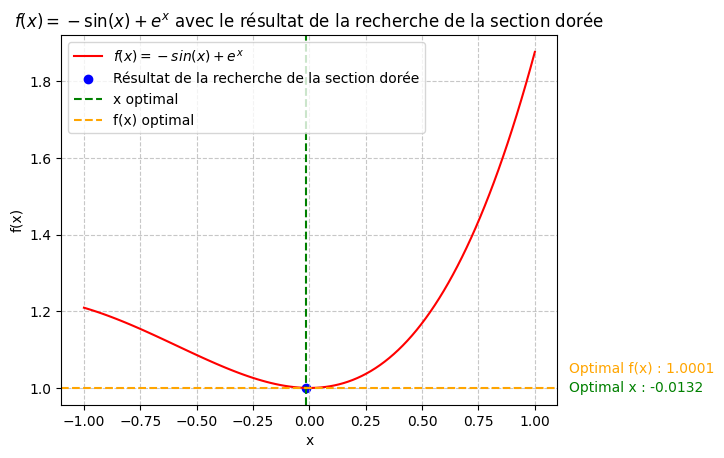

In [6]:

def f(x):
    return -np.sin(x) + np.exp(x)

bornes = [-1, 1]
epsilon = 0.1
x_optimal, fun_optimal = golden_Section_Search(bornes, epsilon, f)

print(f"Solution optimale : {x_optimal:.3f}, Valeur minimale : {fun_optimal:.3f}")

x = np.linspace(bornes[0], bornes[1], 100)
plt.plot(x, f(x), 'r-', label='$f(x) = - sin(x) + e^x$')
plt.scatter(x_optimal, fun_optimal, color='blue', label='Résultat de la recherche de la section dorée', marker='o')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x_optimal, color='green', linestyle='--', label='x optimal')
plt.axhline(fun_optimal, color='orange', linestyle='--', label='f(x) optimal')
plt.text(1.15, 1, f'Optimal x : {x_optimal:.4f}', verticalalignment='center', fontsize=10, color='green')
plt.text(1.15, 1.05, f'Optimal f(x) : {fun_optimal:.4f}', verticalalignment='center', fontsize=10, color='orange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = - \sin(x) + e^x$ avec le résultat de la recherche de la section dorée')
plt.legend()

plt.show()

# Méthode du Gradient (Steepest Descent Method)

<img src="https://i.ibb.co/6bBB1qq/Steepest.png" alt="Steepest Descent Method" width="750"/>

In [7]:
def calc_alpha(f, x_0, s_0):
    alpha = sp.symbols('alpha')
    x_plus_s_alpha = x_0 + s_0 * alpha
    f_with_alpha = f(x_plus_s_alpha)
    derivative_with_respect_to_alpha = sp.diff(f_with_alpha, alpha)
    solutions = sp.solve(derivative_with_respect_to_alpha, alpha)
    
    if not solutions:
        print("Aucune solution trouvée pour alpha.")
        return None
    else:
        alpha_value = solutions[0]
        return alpha_value

    
def calc_simple_gradient(f, variables, x_0):
    expr = f(variables)
    return np.array([expr.diff(var).subs({variables[i]: x_0[i] for i in range(len(variables))}) for var in variables])


In [8]:
def descente_gradient(f, n_variables, x_0, max_iterations=10):
    variables = sp.symbols(f'x1:{n_variables+1}')
    x = np.array(variables)
    
    if len(x_0) != n_variables:
        raise ValueError(f"La longueur du point initial doit correspondre au nombre de variables ({n_variables}).")

    s_0 = np.array(-calc_simple_gradient(f, x, x_0))
    
    donnees_iteration = []

    if not np.any(np.not_equal(s_0, 0)):
        point_resultat = x_0
        print("L'optimisation est déjà à un point stationnaire.")
    else:
        k = 0
        while np.all(np.not_equal(s_0, 0)) and k < max_iterations:
            alpha = calc_alpha(f, x_0, s_0)
            donnees_iteration.append([k, x_0.copy(), s_0.copy(), alpha])
            x_0 = x_0 + s_0 * alpha
            s_0 = np.array(-calc_simple_gradient(f, x, x_0))
            k += 1
            
        donnees_iteration.append([k, x_0.copy(), s_0.copy(), alpha])
        if np.all(np.not_equal(s_0, 0)):
            print("Attention : L'optimisation n'a pas convergé dans le nombre maximal d'itérations.")
    
    result_df = pd.DataFrame(donnees_iteration, columns=['$k$', '$X_k^T$', '$S_k^T$', '$\\alpha$'])

    return result_df, x_0


#### Exemple d'Utilisation (3):
Minimiser la fonction 
$
f(x) = x_1 - x_2 - 2x_1^2 + 2x_1x_2 + x_2^2
$, avec $x^0 = [0, 0]^T$. Utilisez 3 itérations.

Attention : L'optimisation n'a pas convergé dans le nombre maximal d'itérations.
Résultat final : [1/3 5/3]


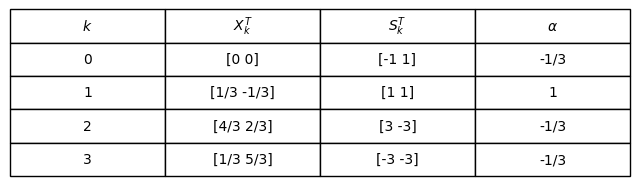

In [9]:
def f(x):
    return x[0] - x[1] - 2 * x[0]**2 + 2 * x[0] * x[1] + x[1]**2

n_variables = 2
max_iterations = 3
point_initial = np.array([0, 0])

donnees_iteration, point_resultat = descente_gradient(f, n_variables, point_initial, max_iterations)
print("Résultat final :", point_resultat)

fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('tight')
ax.axis('off')
table_data = [donnees_iteration.columns.astype(str).tolist()] + donnees_iteration.astype(str).values.tolist()
table = ax.table(cellText=table_data, cellLoc='center', rowLoc='center', loc='center', colLabels=None)
table.scale(1, 2)

plt.show()

# La méthode du gradient conjugué de Fletcher-Reeves

<img src="https://i.ibb.co/SyTvNCX/Fletcher.png" alt="Fletcher-Reeves" width="750"/>

In [10]:
def fletcher_reeves_gradient_conjugue(f, n_variables, x_0, max_iterations=10):
    variables = sp.symbols(f'x1:{n_variables+1}')
    x = np.array(variables)
    
    if len(x_0) != n_variables:
        raise ValueError(f"La longueur du point initial doit correspondre au nombre de variables ({n_variables}).")

    s_0 = np.array(-calc_simple_gradient(f, x, x_0))
    d_0 = s_0 

    df = []

    if np.all(np.equal(s_0, 0)):
        point_resultat = x_0
        print("L'optimisation est déjà à un point stationnaire.")
    else:
        k = 0
        while np.any(np.not_equal(s_0, 0)) and k < max_iterations:
            alpha = calc_alpha(f, x_0, d_0)
            df.append([k, x_0.copy(), d_0.copy(), alpha])
            x_0 = x_0 + d_0 * alpha
            s_new = np.array(-calc_simple_gradient(f, x, x_0))
            beta = np.dot(s_new, s_new) / np.dot(s_0, s_0) 
            d_0 = s_new + beta * d_0
            s_0 = s_new
            k += 1
        
        df.append([k, x_0.copy(), d_0.copy(), alpha])
        if np.any(np.not_equal(s_0, 0)):
            print("Attention : L'optimisation n'a pas convergé dans le nombre maximal d'itérations.")
    
    result_df = pd.DataFrame(df, columns=['$k$', '$X_k^T$', '$S_k^T$', '$\\alpha$'])

    return result_df, x_0


#### Exemple d'Utilisation (4):
Minimiser la fonction à deux variables
$ f(x) = 2x_1^2 + x_2^2 + x_1x_2 - x_1 - 3x_2$, en utilisant la méthode du gradient conjugué de Fletcher-Reeves, en commençant au point $x^0 = [1, 1]^T$. et effectuant trois itérations.

Résultat final : [-1/7 11/7]


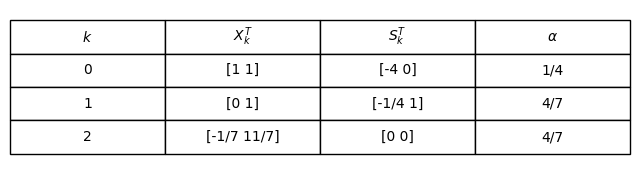

In [11]:
def f(x):
    return 2*x[0]**2 + x[1]**2 + x[0]*x[1] - x[0] - 3*x[1]

n_variables = 2
point_initial = np.array([1, 1])
max_iterations = 3

donnees_iteration, point_resultat = fletcher_reeves_gradient_conjugue(f, n_variables, point_initial, max_iterations)
print("Résultat final :", point_resultat)

fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('tight')
ax.axis('off')
table_data = [donnees_iteration.columns.astype(str).tolist()] + donnees_iteration.astype(str).values.tolist()
table = ax.table(cellText=table_data, cellLoc='center', rowLoc='center', loc='center', colLabels=None)
table.scale(1, 2)

plt.show()


# La méthode de Minimisation de Newton

<img src="https://i.ibb.co/ygKdp15/newton.png" alt="newton" width="750"/>

In [12]:
def calc_hessienne(f, variables, x_0):
    expr = f
    hessienne = [[expr.diff(var1).diff(var2).subs({variables[i]: x_0[i] for i in range(len(variables))}) for var1 in variables] for var2 in variables]
    return np.array(hessienne, dtype=float)

def calc_gradient(f, variables, x_0):
    expr = f
    gradient_expr = [expr.diff(var) for var in variables]
    gradient_func = lambdify(variables, gradient_expr, modules='numpy')
    return gradient_func(*x_0)


In [13]:
def methode_newton(f, n_variables, x_0, max_iter=100, tol=1e-6):
    variables = sp.symbols(f'x1:{n_variables+1}')

    if len(x_0) != n_variables:
        raise ValueError(f"La longueur du point initial doit correspondre au nombre de variables ({n_variables}).")
   
    k = 0
    x_k = np.array(x_0, dtype=float)

    grad_f = calc_gradient(f, variables, x_k)

    # Créer un DataFrame vide pour stocker les résultats
    data = {'$k$': [], '$x_k^T$': [], '$(H(x_k))^T$': [], '$(H^{-1}(x_k))^T$': [], '$\\nabla f(x_k)^T$': []}

    while True:
        hessian = calc_hessienne(f, variables, x_k)
        hessian_inv = np.linalg.inv(hessian)
        
        #history 
        data['$k$'].append(k)
        data['$x_k^T$'].append(np.round(x_k, 4))
        data['$(H(x_k))^T$'].append(np.round(hessian, 4))
        data['$(H^{-1}(x_k))^T$'].append(np.round(hessian_inv, 4))
        data['$\\nabla f(x_k)^T$'].append(np.round(grad_f, 4))
       
        x_k = x_k - hessian_inv @ grad_f
        grad_f = calc_gradient(f, variables, x_k)

        k += 1

        if np.linalg.norm(grad_f) < tol or k >= max_iter:
            
            #history 
            data['$k$'].append(k)
            data['$x_k^T$'].append(np.round(x_k, 4))
            data['$(H(x_k))^T$'].append(np.round(hessian, 4))
            data['$(H^{-1}(x_k))^T$'].append(np.round(hessian_inv, 4))
            data['$\\nabla f(x_k)^T$'].append(np.round(grad_f, 4))
            
            break

    df = pd.DataFrame(data)
    return x_k, f.subs({variables[i]: x_k[i] for i in range(len(variables))}).evalf(), k, df


#### Exemple d'Utilisation (5) :
Minimiser la fonction à deux variables
$ f(x) = 2x_1^2 + x_2^2 + x_1x_2 - x_1 - 3x_2$, en commençant au point $x^0 = [1, 1]^T$. et effectuant trois itérations.

Point minimum : [-0.14285714  1.57142857]
Valeur minimale : -2.28571428571429
Itérations : 1


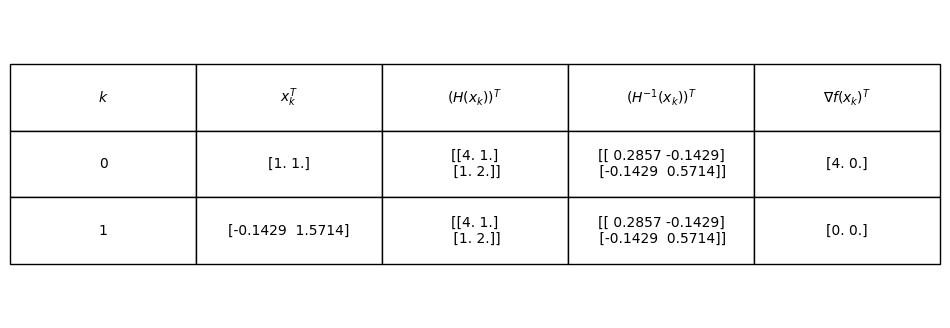

In [14]:
x1, x2 = sp.symbols('x1 x2')
f = 2*x1**2 + x2**2 + x1*x2 - x1 - 3*x2

point_initial = [1, 1]

resultat, valeur_minimale, iterations, df = methode_newton(f, 2, point_initial)

print("Point minimum :", resultat)
print("Valeur minimale :", valeur_minimale)
print("Itérations :", iterations)

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')

donnees_tableau = [df.columns.astype(str).tolist()] + df.astype(str).values.tolist()
tableau = ax.table(cellText=donnees_tableau, cellLoc='center', rowLoc='center', loc='center', colLabels=None)
tableau.scale(1, 4)

plt.show()


#### Exemple d'Utilisation (6) :
Considérez la fonction $ f(x) = 2e^{-x_1} + x_1 + 3e^{-x_2} + x_2$,et miminisez-la en utilisant la mzthode de newton.Nous commencerons à partir du point initial arbitraire $x^0 = [0, 0]^T$. et effectuant trois itérations.

Point minimum : [0.69299481 1.09540377]
Valeur minimale : 3.79176463363043
Itérations : 3


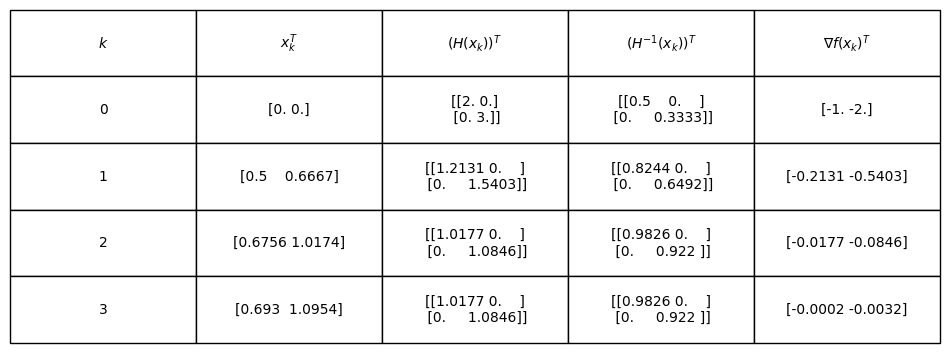

In [15]:
x1, x2 = sp.symbols('x1 x2')
f = 2*sp.exp(-x1) + x1 + 3*sp.exp(-x2) + x2
max_iter = 3
point_initial = [0, 0]

resultat, valeur_minimale, iterations, df = methode_newton(f, 2, point_initial, max_iter)

print("Point minimum :", resultat)
print("Valeur minimale :", valeur_minimale)
print("Itérations :", iterations)

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
table_data = [df.columns.astype(str).tolist()] + df.astype(str).values.tolist()
tableau = ax.table(cellText=table_data, cellLoc='center', rowLoc='center', loc='center', colLabels=None)
tableau.scale(1, 4)

plt.show()
